The Global Power Plant Database is a comprehensive, open source database of power plants around the world. 
It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis.
The database covers approximately 30,000 power plants from 164 countries and includes
thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables 
(e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, 
generation, ownership, and fuel type.

In [1]:
# Import important libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn .metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings('ignore')

# Seeing the datset we can make out that if we are predicting on the basis of primary_fuel we will perform classification algorithm whereas if it is on the basis of capacity_mw we will be performing regressor algorithm.

In [2]:
power=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
# see all the rows and columns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
power.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0   28.1839    73.2407        Solar         NaN         NaN          NaN   
1   24.7663    74.6090         Coal         NaN         NaN          NaN   
2   21.9038    69.3732         Wind         NaN         NaN          NaN   
3   23.8712    91.3602          Gas         NaN         NaN          NaN   
4   21.9603    82.4091         Coal         Oil         NaN          NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                    NaN   
1                                   WRI      NaN                    NaN   
2                                   WRI      NaN                    NaN   
3                                   WRI      NaN                 2018.0   
4                                   WRI      NaN                 2018.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           631.777928           617.789264              843.747   
4          1668.290000          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [5]:
power.tail()

country country_long                          name   gppd_idnr  \
903     IND        India                  YERMARUS TPP  IND0000513   
904     IND        India  Yelesandra Solar Power Plant  WRI1026222   
905     IND        India  Yelisirur wind power project  WRI1026776   
906     IND        India                   ZAWAR MINES  WRI1019901   
907     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
903       1600.0   16.2949    77.3568         Coal         Oil         NaN   
904          3.0   12.8932    78.1654        Solar         NaN         NaN   
905         25.5   15.2758    75.5811         Wind         NaN         NaN   
906         80.0   24.3500    73.7477         Coal         NaN         NaN   
907         16.5    9.9344    77.4768         Wind         NaN         NaN   

     other_fuel3  commissioning_year                                owner  \
903          NaN              2016.0                                  NaN   
904          NaN                 NaN  Karnataka Power Corporation Limited   
905          NaN                 NaN                                  NaN   
906          NaN                 NaN                   Hindustan Zinc ltd   
907          NaN                 NaN                   iEnergy Wind Farms   

                                  source  \
903        Central Electricity Authority   
904  Karnataka Power Corporation Limited   
905                                  CDM   
906                   Hindustan Zinc ltd   
907                                  CDM   

                                                   url geolocation_source  \
903                             http://www.cea.nic.in/                WRI   
904                          http://karnatakapower.com     Industry About   
905  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...                WRI   
906                           http://www.hzlindia.com/                WRI   
907  https://cdm.unfccc.int/Projects/DB/RWTUV134503...                WRI   

     wepp_id  year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
903      NaN                 2018.0                  NaN                  NaN   
904      NaN                    NaN                  NaN                  NaN   
905      NaN                    NaN                  NaN                  NaN   
906      NaN                    NaN                  NaN                  NaN   
907      NaN                    NaN                  NaN                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
903             0.994875            233.59665                865.4   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   
907                  NaN                  NaN                  NaN   

            generation_data_source  estimated_generation_gwh  
903  Central Electricity Authority                       NaN  
904                            NaN                       NaN  
905                            NaN                       NaN  
906                            NaN                       NaN  
907                            NaN                       NaN

In [6]:
# Data Inspection

In [7]:
power.shape       # The dataset contains total of 908  rows and 25 columns

(908, 25)

In [8]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In total 12 features having categorical data and 13features having numerical data

In [9]:
# Checking for missing values if any:

power.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Observation: Few columns are having data missing as equal to the no.of columns anf few are having almost 80% tyo 90%
    data as null . 
    So better not to impute those columns rather drop it as it may lead to improper prediction if we do it with random data.

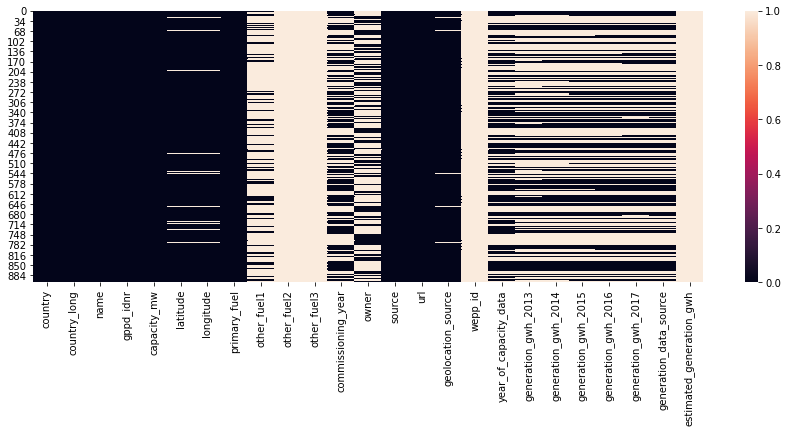

In [10]:
plt.figure(figsize=(15,5))
sns.heatmap(power.isnull())
plt.show()

In [11]:
## Deleting the columns with absolute null values in it

power=power.drop('other_fuel2',axis=1)
power=power.drop('other_fuel3',axis=1)
power=power.drop('wepp_id',axis=1)
power=power.drop('estimated_generation_gwh',axis=1)


In [12]:
power.head()


country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1  commissioning_year  \
0   28.1839    73.2407        Solar         NaN              2011.0   
1   24.7663    74.6090         Coal         NaN                 NaN   
2   21.9038    69.3732         Wind         NaN                 NaN   
3   23.8712    91.3602          Gas         NaN              2004.0   
4   21.9603    82.4091         Coal         Oil              2015.0   

                  owner                                source  \
0           Solar Paces  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                  Ultratech Cement ltd   
2                   AES                                   CDM   
3                   NaN         Central Electricity Authority   
4                   NaN         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                    NaN   
1                                   WRI                    NaN   
2                                   WRI                    NaN   
3                                   WRI                 2018.0   
4                                   WRI                 2018.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           631.777928           617.789264              843.747   
4          1668.290000          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  
0                  NaN                  NaN                            NaN  
1                  NaN                  NaN                            NaN  
2                  NaN                  NaN                            NaN  
3           886.004428           663.774500  Central Electricity Authority  
4          6243.000000          5385.579736  Central Electricity Authority

In [13]:
power.shape

# After we have dropped the column with maximum no.of null values in that column 

(908, 21)

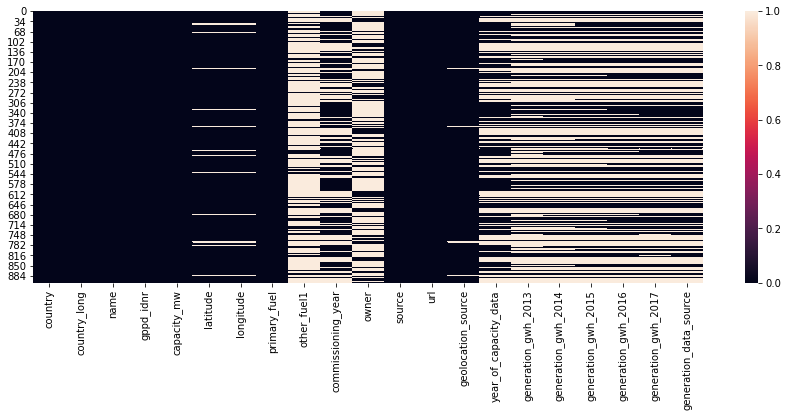

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(power.isnull())
plt.show()

Rest of the null values will be treated further the model

# Deal with the missing values in the table (Data Cleaning


In [15]:
# After dropping 4 columns lets see the no.of categorical and numerical columns
power.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [16]:
# we will first find wheather to use mean or median to impute the numerical variables

lat_median=power['latitude'].median()
print(lat_median)
lat_mean=power['latitude'].mean()
print(lat_mean)

21.7783
21.196188863109057


In [17]:
lon_median=power['longitude'].median()
print(lon_median)
lon_mean=power['longitude'].mean()
print(lon_mean)

76.71924999999999
77.44784779582372


In [18]:
Com_year_median=power['commissioning_year'].median()
print(Com_year_median)
Com_year_mean=power['commissioning_year'].mean()
print(Com_year_mean)


2000.0
1996.876893939394


In [19]:
gw_median=power['generation_gwh_2013'].median()
print(gw_median)
gw_mean=power['generation_gwh_2013'].mean()
print(gw_mean)

797.0634749999999
2304.0592017964586


In [20]:
gw_median=power['generation_gwh_2014'].median()
print(gw_median)
gw_mean=power['generation_gwh_2014'].mean()
print(gw_mean)

805.76
2420.3933164542264


In [21]:
gw_median=power['generation_gwh_2015'].median()
print(gw_median)
gw_mean=power['generation_gwh_2015'].mean()
print(gw_mean)

701.02725
2414.072373401681


In [22]:
gw_median=power['generation_gwh_2016'].median()
print(gw_median)
gw_mean=power['generation_gwh_2016'].mean()
print(gw_mean)

716.7283500000001
2453.9362918708252


In [23]:
gw_median=power['generation_gwh_2017'].median()
print(gw_median)
gw_mean=power['generation_gwh_2017'].mean()
print(gw_mean)

807.6016999999999
2531.7544577527983


10 categorical independent  features with 1 dependent target feature(primary_fuel)

9 numerical independent features with 1 dependent target feature (capacity_mw)


In [24]:
# Using mode for all categorical and also for the numerical column i.e year_of_capacity_data:

power['other_fuel1'].fillna(power['other_fuel1'].mode()[0], inplace=True)
power['owner'].fillna(power['owner'].mode()[0], inplace=True)
power['geolocation_source'].fillna(power['geolocation_source'].mode()[0], inplace=True)
power['generation_data_source'].fillna(power['generation_data_source'].mode()[0], inplace=True)

# Although numerical value but we will be going with mode to impute this column:
power['year_of_capacity_data'].fillna(power['year_of_capacity_data'].mode()[0], inplace=True)


# For imputing numeriocal features we using mean or median as per requirement:
# As we have high number of outliers in the numerical feature it is recommemnded to go with median rather than mean or mode
power['latitude'].fillna(power['latitude'].mean(), inplace=True)
power['longitude'].fillna(power['longitude'].mean(), inplace=True)
power['commissioning_year'].fillna(power['commissioning_year'].mean(), inplace=True)
power['generation_gwh_2013'].fillna(power['generation_gwh_2013'].median(), inplace=True)
power['generation_gwh_2014'].fillna(power['generation_gwh_2014'].median(), inplace=True)
power['generation_gwh_2015'].fillna(power['generation_gwh_2015'].median(), inplace=True)
power['generation_gwh_2016'].fillna(power['generation_gwh_2016'].median(), inplace=True)
power['generation_gwh_2017'].fillna(power['generation_gwh_2017'].median(), inplace=True)

# EDA

In [25]:
# After dropping 4 columns lets see the no.of categorical and numerical columns
power.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

Now our data it clean from null values


<AxesSubplot:>

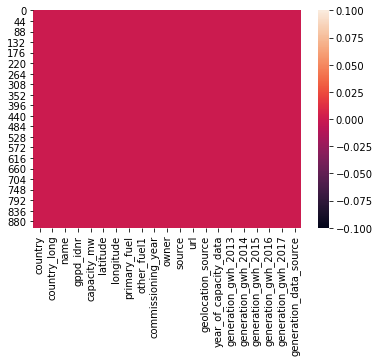

In [26]:
sns.heatmap(power.isnull())

# Visualization on the basis of numerical values


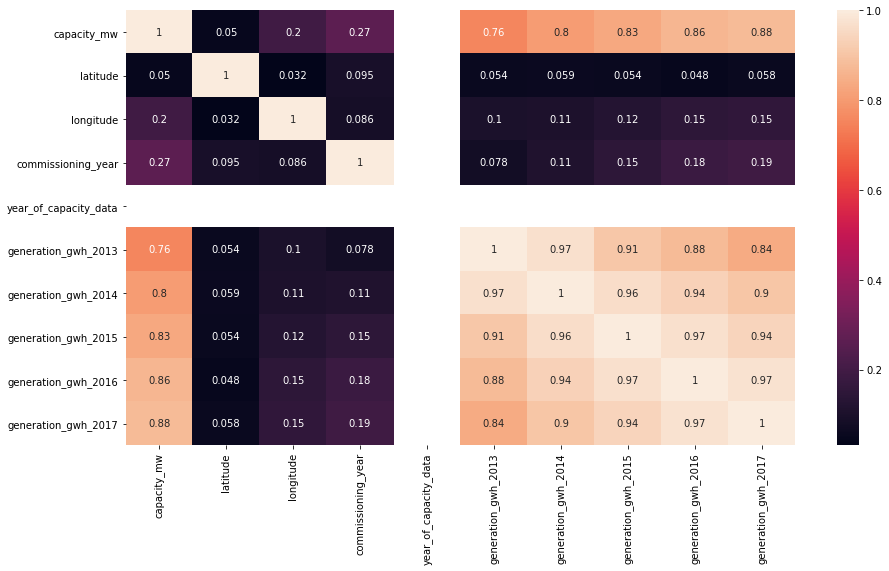

In [28]:
# Finding the correlation between the feature

plt.figure(figsize=(15,8))
sns.heatmap(power.corr(),annot=True)
plt.show()

Observation: 
   
   1.Its clearly visible from the plot that capacity_mw is highly coorrelated with the generation_gwh(of all the years).
    
   2. Even all the years generation_gwh all highly correlated to each other.

In [29]:
# Lets see the bar plot of all numerical fetures to identify the skweness.

<Figure size 360x360 with 0 Axes>

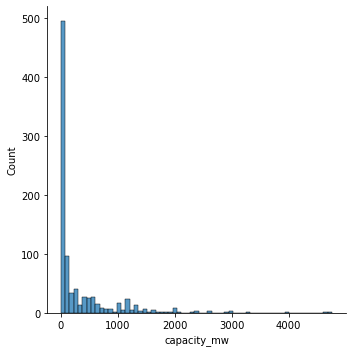

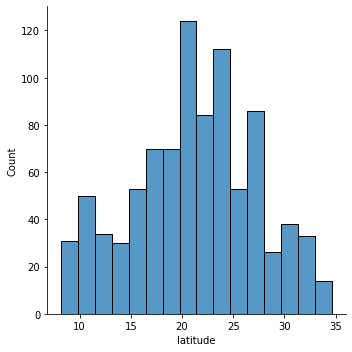

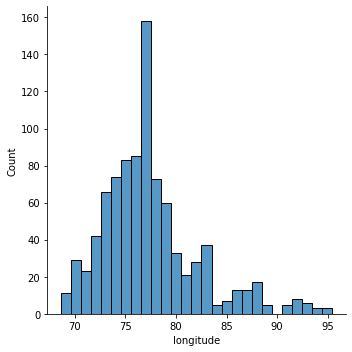

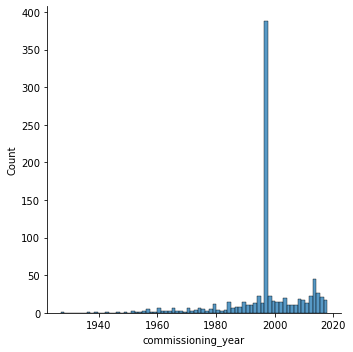

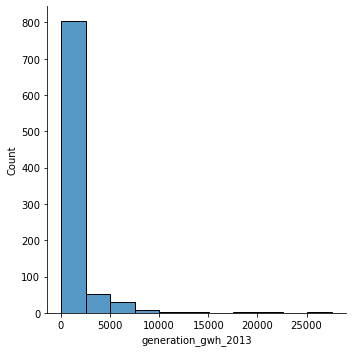

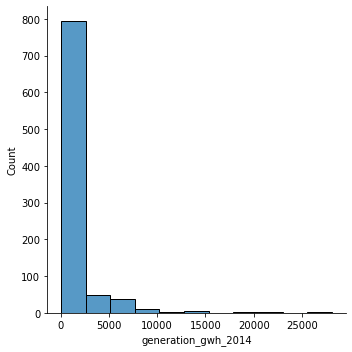

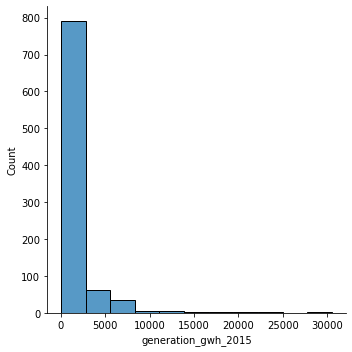

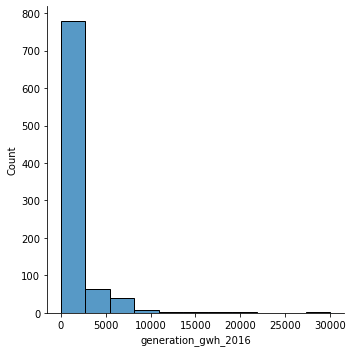

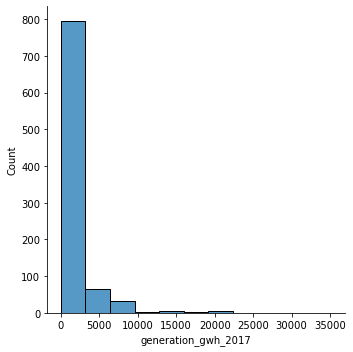

In [30]:
plt.figure(figsize=(5,5))
sns.displot(power.capacity_mw)
plt.show()
sns.displot(power.latitude)
plt.show()
sns.displot(power.longitude )
plt.show()
sns.displot(power.commissioning_year)
plt.show()
sns.displot(power.generation_gwh_2013)
plt.show()
sns.displot(power.generation_gwh_2014)
plt.show()
sns.displot(power.generation_gwh_2015)
plt.show()
sns.displot(power.generation_gwh_2016)
plt.show()
sns.displot(power.generation_gwh_2017)
plt.show()

Observation:
    
    Only latitude seems to be alligned whereas all other data is either left skewed and most data is right skewed.
    
    Also we can see that some outliers may be present in the features.
    

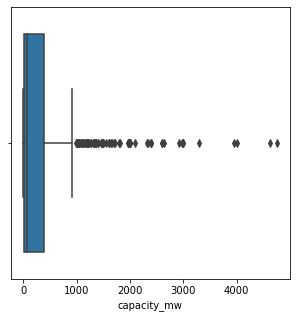

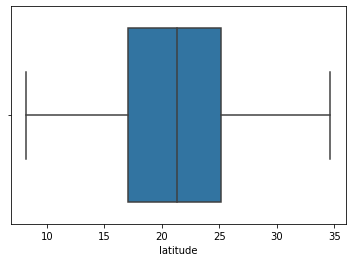

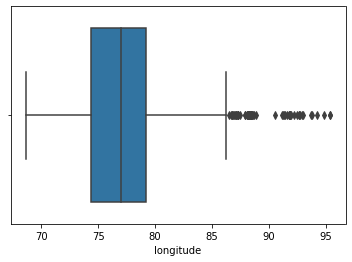

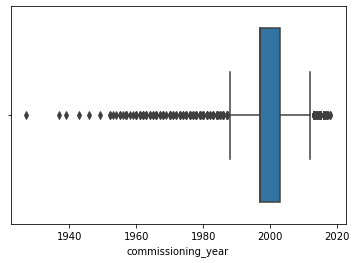

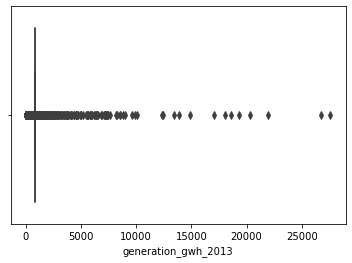

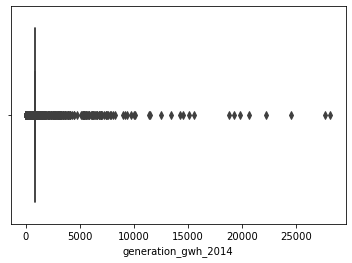

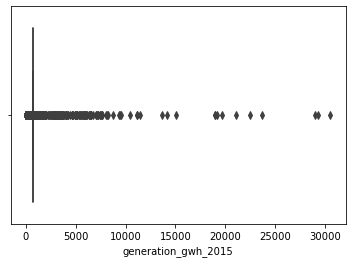

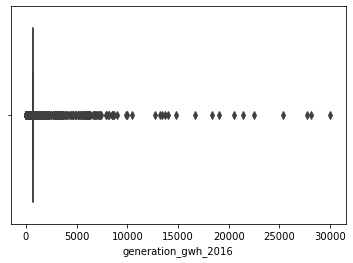

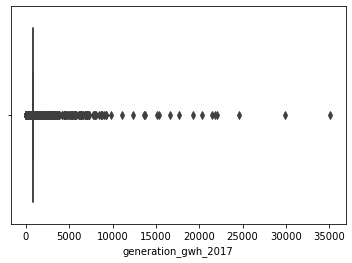

In [31]:
# We shall  determine the oiutliers in all the numerical features


plt.figure(figsize=(5,5))
sns.boxplot(power.capacity_mw)
plt.show()
sns.boxplot(power.latitude)
plt.show()
sns.boxplot(power.longitude )
plt.show()
sns.boxplot(power.commissioning_year)
plt.show()
sns.boxplot(power.generation_gwh_2013)
plt.show()
sns.boxplot(power.generation_gwh_2014)
plt.show()
sns.boxplot(power.generation_gwh_2015)
plt.show()
sns.boxplot(power.generation_gwh_2016)
plt.show()
sns.boxplot(power.generation_gwh_2017)
plt.show()

Almost all the featues are having outliers except lattitude column.

In [32]:
# Plotting for categorical variables: 

In [33]:
power.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source'],
      dtype='object')

In [34]:
power['country'].value_counts()

IND    908
Name: country, dtype: int64

In [35]:
power['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [36]:
power['other_fuel1'].value_counts()

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [37]:
power['geolocation_source'].value_counts()

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

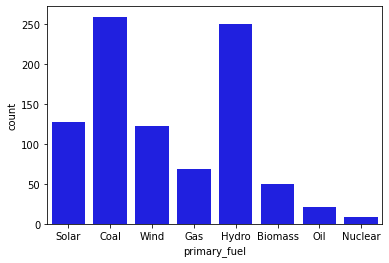

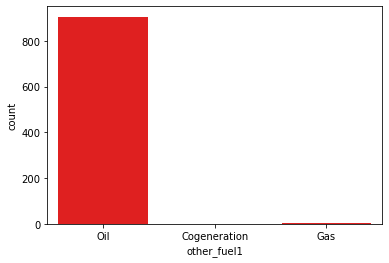

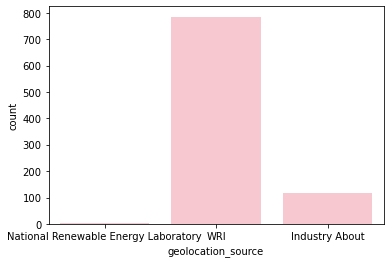

In [38]:

sns.countplot(power['primary_fuel'],color='b')
plt.show()

sns.countplot(power['other_fuel1'],color='r')
plt.show()

sns.countplot(power['geolocation_source'],color='pink')
plt.show()

In [39]:
# Now we will check the relation among the features:

Text(0.5, 1.0, 'primary_fuel Vs longitude')

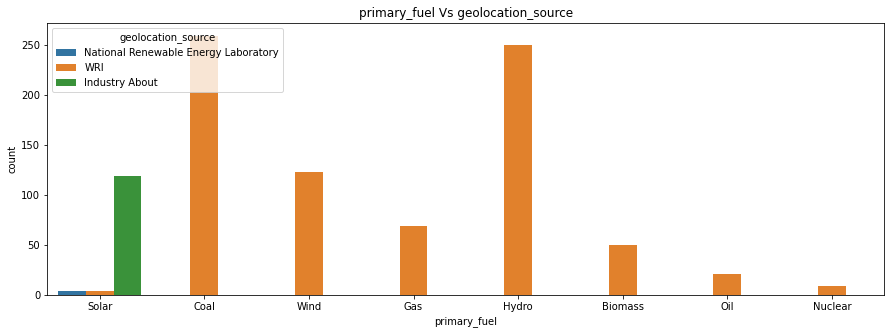

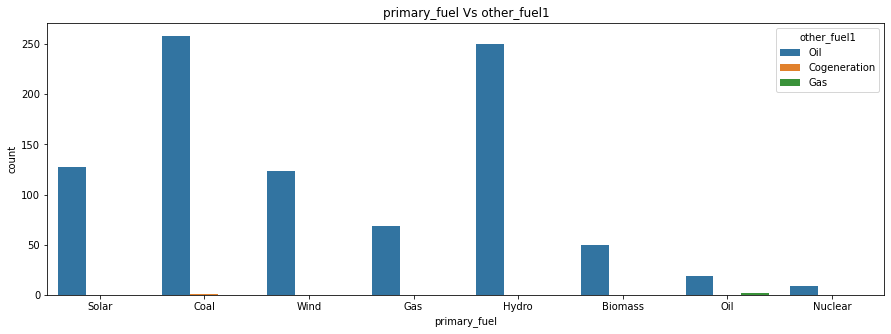

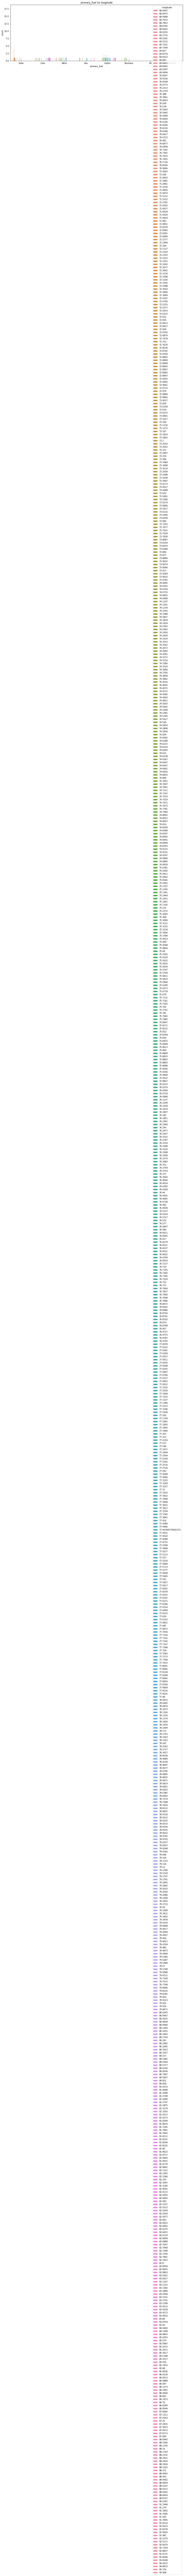

In [40]:


plt.figure(figsize=(15,5))
sns.countplot(x='primary_fuel',hue='geolocation_source',data=power)
plt.title('primary_fuel Vs geolocation_source')

plt.figure(figsize=(15,5))
sns.countplot(x='primary_fuel',hue='other_fuel1',data=power)
plt.title('primary_fuel Vs other_fuel1')

plt.figure(figsize=(15,5))
sns.countplot(x='primary_fuel',hue='longitude',data=power)
plt.title('primary_fuel Vs longitude')

In [41]:
power.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1  commissioning_year  \
0   28.1839    73.2407        Solar         Oil         2011.000000   
1   24.7663    74.6090         Coal         Oil         1996.876894   
2   21.9038    69.3732         Wind         Oil         1996.876894   
3   23.8712    91.3602          Gas         Oil         2004.000000   
4   21.9603    82.4091         Coal         Oil         2015.000000   

                  owner                                source  \
0           Solar Paces  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                  Ultratech Cement ltd   
2                   AES                                   CDM   
3           Acc Acc ltd         Central Electricity Authority   
4           Acc Acc ltd         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                 2018.0   
1                                   WRI                 2018.0   
2                                   WRI                 2018.0   
3                                   WRI                 2018.0   
4                                   WRI                 2018.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0           797.063475           805.760000            701.02725   
1           797.063475           805.760000            701.02725   
2           797.063475           805.760000            701.02725   
3           631.777928           617.789264            843.74700   
4          1668.290000          3035.550000           5916.37000   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  
0           716.728350           807.601700  Central Electricity Authority  
1           716.728350           807.601700  Central Electricity Authority  
2           716.728350           807.601700  Central Electricity Authority  
3           886.004428           663.774500  Central Electricity Authority  
4          6243.000000          5385.579736  Central Electricity Authority

In [42]:
power.shape

(908, 21)

# Now we will be working on categorical data and change it into numerical value

'''1. But before that drop some columns that are really not making any meaning or required in the model building.

2. Country amd Country _long both making same sense so we can drp anyone.
3. gppd_idnr is also unique for all so rows and of no use as such in the model building.'''

# 

In [43]:
# We should treat the skewed data

<AxesSubplot:xlabel='capacity_mw'>

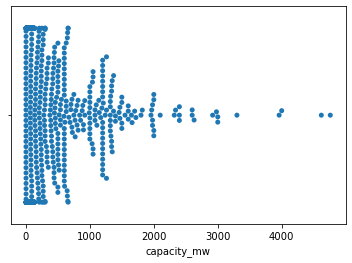

In [44]:
sns.swarmplot(power.capacity_mw)

<AxesSubplot:xlabel='capacity_mw'>

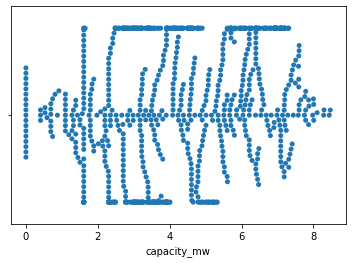

In [45]:
power['capacity_mw']=np.log(power['capacity_mw'])
sns.swarmplot(power.capacity_mw)

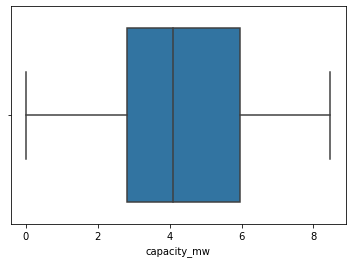

In [46]:
# Distribution after normalising
sns.boxplot(power.capacity_mw)
plt.show()

After doing normalization  the data looks as above and almost normalised

<AxesSubplot:xlabel='generation_gwh_2013'>

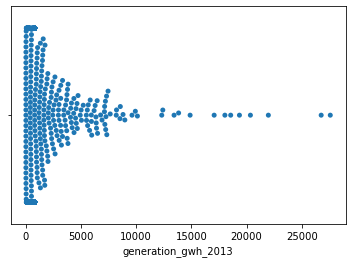

In [47]:
sns.swarmplot(power.generation_gwh_2013)

<AxesSubplot:xlabel='generation_gwh_2013'>

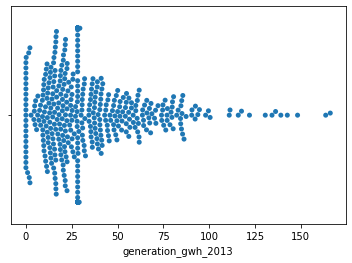

In [48]:
power['generation_gwh_2013']=np.sqrt(power['generation_gwh_2013'])
sns.swarmplot(power.generation_gwh_2013)# Distribution after normalising

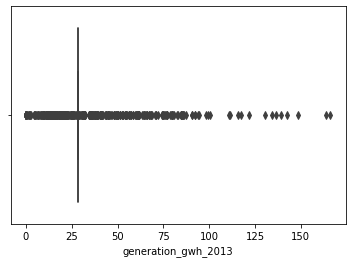

In [49]:
# Distribution after normalising
sns.boxplot(power.generation_gwh_2013)
plt.show()

<AxesSubplot:xlabel='generation_gwh_2014'>

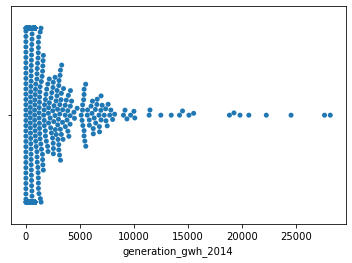

In [50]:
sns.swarmplot(power.generation_gwh_2014)


<AxesSubplot:xlabel='generation_gwh_2014'>

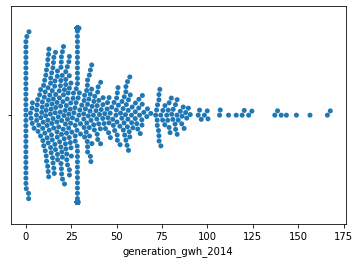

In [51]:
power['generation_gwh_2014']=np.sqrt(power['generation_gwh_2014'])
sns.swarmplot(power.generation_gwh_2014)# Distribution after normalising

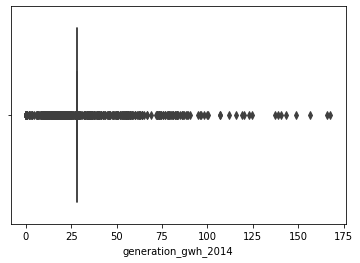

In [52]:
# Distribution after normalising
sns.boxplot(power.generation_gwh_2014)
plt.show()

<AxesSubplot:xlabel='generation_gwh_2015'>

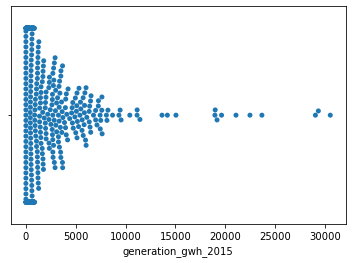

In [53]:
sns.swarmplot(power.generation_gwh_2015)

<AxesSubplot:xlabel='generation_gwh_2015'>

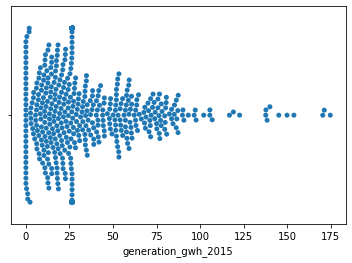

In [54]:
power['generation_gwh_2015']=np.sqrt(power['generation_gwh_2015'])
sns.swarmplot(power.generation_gwh_2015)# Distribution after normalising

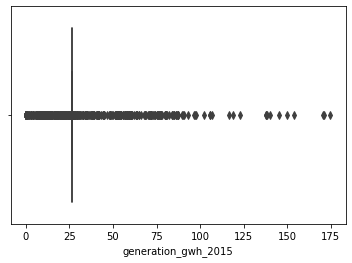

In [55]:
sns.boxplot(power.generation_gwh_2015)
plt.show()

<AxesSubplot:xlabel='generation_gwh_2016'>

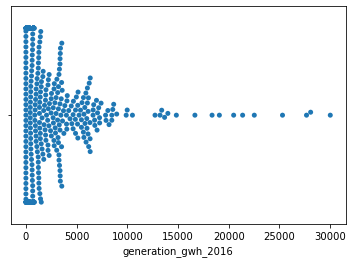

In [56]:
sns.swarmplot(power.generation_gwh_2016)

<AxesSubplot:xlabel='generation_gwh_2016'>

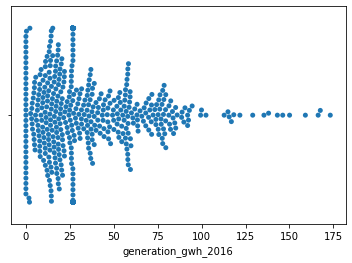

In [57]:
power['generation_gwh_2016']=np.sqrt(power['generation_gwh_2016'])
sns.swarmplot(power.generation_gwh_2016)# Distribution after normalising

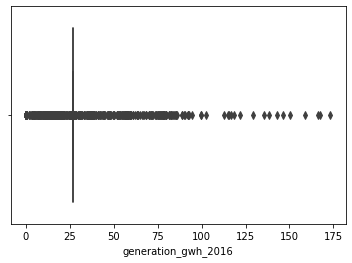

In [58]:
sns.boxplot(power.generation_gwh_2016)
plt.show()# Distribution after normalising

<AxesSubplot:xlabel='generation_gwh_2017'>

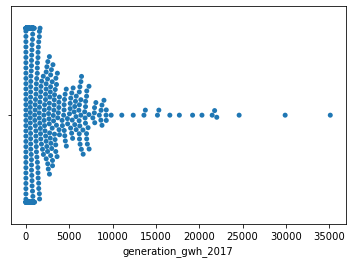

In [59]:
sns.swarmplot(power.generation_gwh_2017)

<AxesSubplot:xlabel='generation_gwh_2017'>

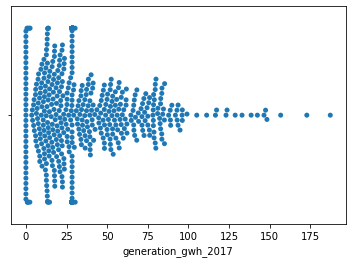

In [60]:
power['generation_gwh_2017']=np.sqrt(power['generation_gwh_2017'])
sns.swarmplot(power.generation_gwh_2017)# Distribution after normalising

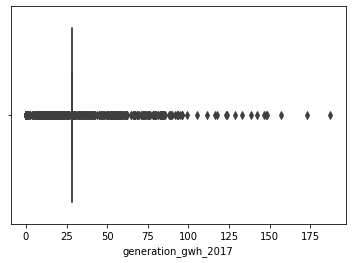

In [61]:
# Distribution after normalising
sns.boxplot(power.generation_gwh_2017)
plt.show()

The above plotting shows how we have tried and normalised the data

In [62]:
# Drop the id Column as it is really not required

power=power.drop('gppd_idnr',axis=1)
power.head()

country country_long                      name  capacity_mw  latitude  \
0     IND        India          ACME Solar Tower     0.916291   28.1839   
1     IND        India       ADITYA CEMENT WORKS     4.584967   24.7663   
2     IND        India  AES Saurashtra Windfarms     3.668677   21.9038   
3     IND        India               AGARTALA GT     4.905275   23.8712   
4     IND        India              AKALTARA TPP     7.495542   21.9603   

   longitude primary_fuel other_fuel1  commissioning_year  \
0    73.2407        Solar         Oil         2011.000000   
1    74.6090         Coal         Oil         1996.876894   
2    69.3732         Wind         Oil         1996.876894   
3    91.3602          Gas         Oil         2004.000000   
4    82.4091         Coal         Oil         2015.000000   

                  owner                                source  \
0           Solar Paces  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                  Ultratech Cement ltd   
2                   AES                                   CDM   
3           Acc Acc ltd         Central Electricity Authority   
4           Acc Acc ltd         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                 2018.0   
1                                   WRI                 2018.0   
2                                   WRI                 2018.0   
3                                   WRI                 2018.0   
4                                   WRI                 2018.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0            28.232313            28.385912            26.476919   
1            28.232313            28.385912            26.476919   
2            28.232313            28.385912            26.476919   
3            25.135193            24.855367            29.047323   
4            40.844706            55.095826            76.917943   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  
0            26.771783            28.418334  Central Electricity Authority  
1            26.771783            28.418334  Central Electricity Authority  
2            26.771783            28.418334  Central Electricity Authority  
3            29.765827            25.763822  Central Electricity Authority  
4            79.012657            73.386509  Central Electricity Authority

In [63]:
power=power.drop('country',axis=1)
power.shape

(908, 19)

In [64]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            908 non-null    object 
 1   name                    908 non-null    object 
 2   capacity_mw             908 non-null    float64
 3   latitude                908 non-null    float64
 4   longitude               908 non-null    float64
 5   primary_fuel            908 non-null    object 
 6   other_fuel1             908 non-null    object 
 7   commissioning_year      908 non-null    float64
 8   owner                   908 non-null    object 
 9   source                  908 non-null    object 
 10  url                     908 non-null    object 
 11  geolocation_source      908 non-null    object 
 12  year_of_capacity_data   908 non-null    float64
 13  generation_gwh_2013     908 non-null    float64
 14  generation_gwh_2014     908 non-null    fl

In [65]:
# converting the categorical variable into nummerical values:

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [67]:
power['country_long']=le.fit_transform(power['country_long'])
power['name']=le.fit_transform(power['name'])
power['primary_fuel']=le.fit_transform(power['primary_fuel'])
power['other_fuel1']=le.fit_transform(power['other_fuel1'])
power['owner']=le.fit_transform(power['owner'])
power['source']=le.fit_transform(power['source'])
power['url']=le.fit_transform(power['url'])
power['geolocation_source']=le.fit_transform(power['geolocation_source'])
power['generation_data_source']=le.fit_transform(power['generation_data_source'])

In [68]:
power.head()

country_long  name  capacity_mw  latitude  longitude  primary_fuel  \
0             0     0     0.916291   28.1839    73.2407             6   
1             0     1     4.584967   24.7663    74.6090             1   
2             0     2     3.668677   21.9038    69.3732             7   
3             0     3     4.905275   23.8712    91.3602             2   
4             0     4     7.495542   21.9603    82.4091             1   

   other_fuel1  commissioning_year  owner  source  url  geolocation_source  \
0            2         2011.000000    229     109  128                   1   
1            2         1996.876894    258     174  173                   2   
2            2         1996.876894      2      21  205                   2   
3            2         2004.000000      5      22   58                   2   
4            2         2015.000000      5      22   58                   2   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                 2018.0            28.232313            28.385912   
1                 2018.0            28.232313            28.385912   
2                 2018.0            28.232313            28.385912   
3                 2018.0            25.135193            24.855367   
4                 2018.0            40.844706            55.095826   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            26.476919            26.771783            28.418334   
1            26.476919            26.771783            28.418334   
2            26.476919            26.771783            28.418334   
3            29.047323            29.765827            25.763822   
4            76.917943            79.012657            73.386509   

   generation_data_source  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

# Model Building

In [69]:
power_fuel=power.copy()        # Copy of power dataset to perform model building on primary fuel using classification
power_capacity=power.copy()    # Copy of power dataset to perform model building capacity_mw using regression

# Building the model on the basis of capacity_mw

In [70]:

power_capacity.head()

country_long  name  capacity_mw  latitude  longitude  primary_fuel  \
0             0     0     0.916291   28.1839    73.2407             6   
1             0     1     4.584967   24.7663    74.6090             1   
2             0     2     3.668677   21.9038    69.3732             7   
3             0     3     4.905275   23.8712    91.3602             2   
4             0     4     7.495542   21.9603    82.4091             1   

   other_fuel1  commissioning_year  owner  source  url  geolocation_source  \
0            2         2011.000000    229     109  128                   1   
1            2         1996.876894    258     174  173                   2   
2            2         1996.876894      2      21  205                   2   
3            2         2004.000000      5      22   58                   2   
4            2         2015.000000      5      22   58                   2   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                 2018.0            28.232313            28.385912   
1                 2018.0            28.232313            28.385912   
2                 2018.0            28.232313            28.385912   
3                 2018.0            25.135193            24.855367   
4                 2018.0            40.844706            55.095826   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            26.476919            26.771783            28.418334   
1            26.476919            26.771783            28.418334   
2            26.476919            26.771783            28.418334   
3            29.047323            29.765827            25.763822   
4            76.917943            79.012657            73.386509   

   generation_data_source  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

 It helps to eliminate the nan,infinity values 

In [71]:


power_capacity_filter=power_capacity.isin([np.nan,np.inf,-np.inf])
power_capacity=power_capacity[~power_capacity_filter]
power_capacity.dropna(inplace=True)
power_capacity.round(3)

country_long  name  capacity_mw  latitude  longitude  primary_fuel  \
0               0     0        0.916    28.184     73.241             6   
1               0     1        4.585    24.766     74.609             1   
2               0     2        3.669    21.904     69.373             7   
3               0     3        4.905    23.871     91.360             2   
4               0     4        7.496    21.960     82.409             1   
5               0     5        5.521    23.769     68.645             1   
6               0     6        4.094    10.455     77.008             3   
7               0     7        5.257    32.226     77.207             3   
8               0     8        5.670    16.330     75.886             3   
9               0     9        5.347    23.164     81.637             1   
10              0    10        7.208    21.078     77.901             1   
11              0    11        4.898    31.272     76.494             3   
12              0    12        7.090    24.201     82.800             1   
13              0    13        2.830    31.241     77.877             3   
14              0    14        2.197    21.196     77.448             3   
15              0    15        7.875    24.201     82.789             1   
16              0    16        6.039    25.180     76.319             2   
17              0    17        6.397    23.067     81.784             1   
18              0    18        7.090    23.066     81.786             1   
19              0    19        2.303    18.084     76.185             0   
20              0    20        2.833    19.587     74.706             0   
21              0    21        3.178    16.771     74.919             0   
22              0    22        6.480    26.628     79.529             2   
23              0    23        6.397    21.744     83.274             1   
24              0    24        3.829    19.788     79.152             1   
25              0    25        3.912    21.196     77.448             6   
26              0    26        0.000    28.362     74.240             6   
27              0    27        2.803    14.575     76.393             7   
28              0    28        3.912    14.946     77.687             6   
29              0    29        4.733    18.858     73.640             7   
30              0    30        2.986    10.724     77.189             7   
31              0    31        2.580    14.479     76.348             7   
32              0    32        1.609    27.347     71.692             6   
33              0    33        1.609    27.360     71.692             6   
34              0    34        1.609    27.363     71.692             6   
35              0    35        1.609    27.366     71.692             6   
36              0    36        1.609    27.354     71.692             6   
37              0    37        1.609    27.350     71.692             6   
38              0    38        1.609    27.357     71.692             6   
39              0    39        5.298    13.098     80.270             5   
40              0    40        6.558    28.506     77.307             1   
41              0    41        3.332    16.280     75.225             0   
42              0    42        6.109    33.182     75.316             3   
43              0    43        6.109    21.196     77.448             3   
44              0    44        5.193    32.806     76.142             3   
45              0    45        6.957    23.828     87.451             1   
46              0    46        6.397    21.196     77.448             1   
47              0    47        6.234    18.140     82.122             3   
48              0    48        4.212    19.860     79.342             1   
49              0    49        2.303    24.693     74.689             1   
50              0    50        5.704    22.342     82.430             1   
51              0    51        6.120    22.996     88.404             1   
52              0    52       

<AxesSubplot:>

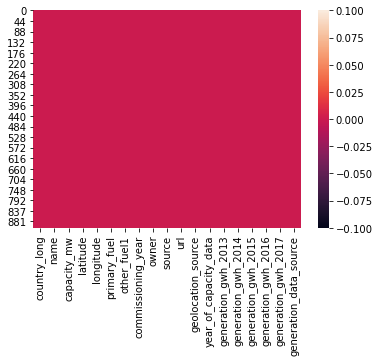

In [72]:
sns.heatmap(power_capacity.isnull())

In [73]:
Y=power_capacity['capacity_mw']    # Dependent variable
X=power_capacity.drop('capacity_mw',axis=1)# Independent variable


In [74]:
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X)


In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [76]:

DecisionTree=DecisionTreeRegressor()
Bagging=BaggingRegressor()
knn=KNeighborsRegressor()
Random=RandomForestRegressor()
Svr=SVR()

In [77]:
alg=[DecisionTree,knn,Bagging,Random,Svr]
acc_models={}
for model in alg:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    acc_models[model]=round(r2_score(Y_test,Y_pred)*100,1)
    print("Model Name:",model) 
    print('Accuracy ::',{round(r2_score(Y_test,Y_pred)*100,1)})
    print('Mean Absolute Error(MAE) is::',{mean_absolute_error(Y_test,Y_pred)})
    print('Mean Squared Error(MSE) ::',{mean_squared_error(Y_test,Y_pred)})
    print('Root Mean Squared Error is ::',{np.sqrt(mean_squared_error(Y_test,Y_pred))})
    print("--------------------------------------------------------")


Model Name: DecisionTreeRegressor()
Accuracy :: {75.9}
Mean Absolute Error(MAE) is:: {0.6733068720651829}
Mean Squared Error(MSE) :: {0.8389814331946729}
Root Mean Squared Error is :: {0.9159592966910008}
--------------------------------------------------------
Model Name: KNeighborsRegressor()
Accuracy :: {66.4}
Mean Absolute Error(MAE) is:: {0.8116488113206733}
Mean Squared Error(MSE) :: {1.1723202817903366}
Root Mean Squared Error is :: {1.0827374020464688}
--------------------------------------------------------
Model Name: BaggingRegressor()
Accuracy :: {80.7}
Mean Absolute Error(MAE) is:: {0.5729687895378681}
Mean Squared Error(MSE) :: {0.6717372415523727}
Root Mean Squared Error is :: {0.819595779364665}
--------------------------------------------------------
Model Name: RandomForestRegressor()
Accuracy :: {84.0}
Mean Absolute Error(MAE) is:: {0.5316620193943007}
Mean Squared Error(MSE) :: {0.5570152494596378}
Root Mean Squared Error is :: {0.746334542587731}
------------------

In [78]:
acc_models

{DecisionTreeRegressor(): 75.9,
 KNeighborsRegressor(): 66.4,
 BaggingRegressor(): 80.7,
 RandomForestRegressor(): 84.0,
 SVR(): 63.9}

Random Forest giving much accuracy of 84%

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

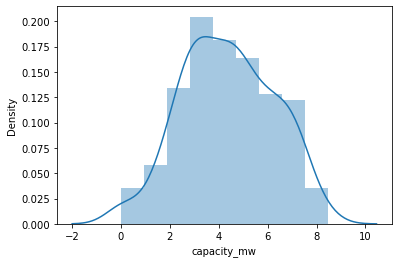

In [79]:
sns.distplot((Y_test))

<AxesSubplot:ylabel='Density'>

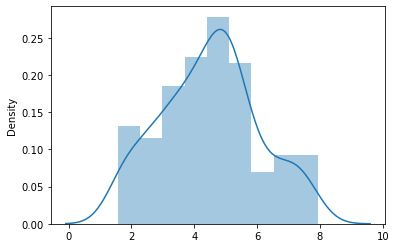

In [80]:
sns.distplot((Y_pred))


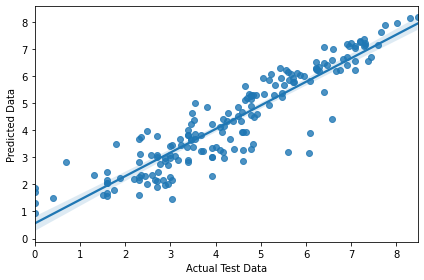

In [81]:
RandomForest=RandomForestRegressor()
RandomForest.fit(X_train,Y_train)
Y_pred=RandomForest.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

In [82]:
df=pd.DataFrame({'Y Test':Y_test,'Pred':Y_pred},columns=['Y Test','Pred'])
df.head()

Y Test      Pred
869  5.226821  6.057124
439  0.000000  0.955216
342  4.276666  4.645991
735  5.799093  6.098629
784  3.496508  3.383261

# Hyper Tuning The random Forest Model

In [83]:
X_train,Y_train,X_test,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=80)
estimator=RandomForestRegressor()

param_grid={
    "n_estimators":[10,20,30],
    "max_features":["auto", "sqrt", "log2"],
    "min_samples_split":[2,4,8],
    "bootstrap":[True,False]    
}
gridsearch=GridSearchCV(estimator,param_grid,n_jobs=-1,cv=5)

gridsearch.fit(X_scaled,Y)
print(gridsearch.best_params_ , gridsearch.best_score_)


{'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 10} 0.8072796061996748


In [85]:
RandomForest=RandomForestRegressor(n_estimators=30,max_features='log2',min_samples_split=4,bootstrap=True)
RandomForest.fit(X_scaled,Y)
Y_pred=RandomForest.predict(X_scaled)
r2_sc=r2_score(Y,Y_pred)
print("r2_score:",r2_sc*100)



r2_score: 96.03577333499406


The score has incresed from 84% to 96 %

# We will be building  classification model on the basis of primary fuel now

In [86]:
power_fuel.head()

country_long  name  capacity_mw  latitude  longitude  primary_fuel  \
0             0     0     0.916291   28.1839    73.2407             6   
1             0     1     4.584967   24.7663    74.6090             1   
2             0     2     3.668677   21.9038    69.3732             7   
3             0     3     4.905275   23.8712    91.3602             2   
4             0     4     7.495542   21.9603    82.4091             1   

   other_fuel1  commissioning_year  owner  source  url  geolocation_source  \
0            2         2011.000000    229     109  128                   1   
1            2         1996.876894    258     174  173                   2   
2            2         1996.876894      2      21  205                   2   
3            2         2004.000000      5      22   58                   2   
4            2         2015.000000      5      22   58                   2   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                 2018.0            28.232313            28.385912   
1                 2018.0            28.232313            28.385912   
2                 2018.0            28.232313            28.385912   
3                 2018.0            25.135193            24.855367   
4                 2018.0            40.844706            55.095826   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            26.476919            26.771783            28.418334   
1            26.476919            26.771783            28.418334   
2            26.476919            26.771783            28.418334   
3            29.047323            29.765827            25.763822   
4            76.917943            79.012657            73.386509   

   generation_data_source  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [87]:

power_fuel_filter=power_capacity.isin([np.nan,np.inf,-np.inf])
power_fuel=power_capacity[~power_fuel_filter]
power_fuel.dropna(inplace=True)
power_fuel.round(3)


country_long  name  capacity_mw  latitude  longitude  primary_fuel  \
0               0     0        0.916    28.184     73.241             6   
1               0     1        4.585    24.766     74.609             1   
2               0     2        3.669    21.904     69.373             7   
3               0     3        4.905    23.871     91.360             2   
4               0     4        7.496    21.960     82.409             1   
5               0     5        5.521    23.769     68.645             1   
6               0     6        4.094    10.455     77.008             3   
7               0     7        5.257    32.226     77.207             3   
8               0     8        5.670    16.330     75.886             3   
9               0     9        5.347    23.164     81.637             1   
10              0    10        7.208    21.078     77.901             1   
11              0    11        4.898    31.272     76.494             3   
12              0    12        7.090    24.201     82.800             1   
13              0    13        2.830    31.241     77.877             3   
14              0    14        2.197    21.196     77.448             3   
15              0    15        7.875    24.201     82.789             1   
16              0    16        6.039    25.180     76.319             2   
17              0    17        6.397    23.067     81.784             1   
18              0    18        7.090    23.066     81.786             1   
19              0    19        2.303    18.084     76.185             0   
20              0    20        2.833    19.587     74.706             0   
21              0    21        3.178    16.771     74.919             0   
22              0    22        6.480    26.628     79.529             2   
23              0    23        6.397    21.744     83.274             1   
24              0    24        3.829    19.788     79.152             1   
25              0    25        3.912    21.196     77.448             6   
26              0    26        0.000    28.362     74.240             6   
27              0    27        2.803    14.575     76.393             7   
28              0    28        3.912    14.946     77.687             6   
29              0    29        4.733    18.858     73.640             7   
30              0    30        2.986    10.724     77.189             7   
31              0    31        2.580    14.479     76.348             7   
32              0    32        1.609    27.347     71.692             6   
33              0    33        1.609    27.360     71.692             6   
34              0    34        1.609    27.363     71.692             6   
35              0    35        1.609    27.366     71.692             6   
36              0    36        1.609    27.354     71.692             6   
37              0    37        1.609    27.350     71.692             6   
38              0    38        1.609    27.357     71.692             6   
39              0    39        5.298    13.098     80.270             5   
40              0    40        6.558    28.506     77.307             1   
41              0    41        3.332    16.280     75.225             0   
42              0    42        6.109    33.182     75.316             3   
43              0    43        6.109    21.196     77.448             3   
44              0    44        5.193    32.806     76.142             3   
45              0    45        6.957    23.828     87.451             1   
46              0    46        6.397    21.196     77.448             1   
47              0    47        6.234    18.140     82.122             3   
48              0    48        4.212    19.860     79.342             1   
49              0    49        2.303    24.693     74.689             1   
50              0    50        5.704    22.342     82.430             1   
51              0    51        6.120    22.996     88.404             1   
52              0    52       

<AxesSubplot:>

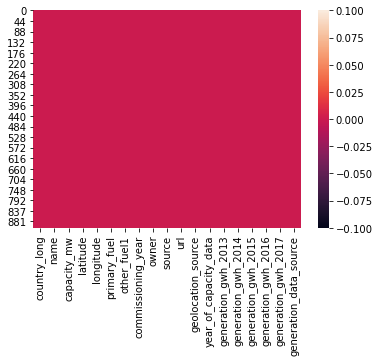

In [88]:
sns.heatmap(power_fuel.isnull())

In [89]:
# assinging the values of x and y for training and testing


x_c=power_fuel.drop(columns=['primary_fuel'],axis=1)# independent variables
y_c=power_fuel['primary_fuel']  # dependent Variables
print(x_c.shape)
print(y_c.shape)

(907, 18)
(907,)


In [90]:

xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,random_state=42,test_size=0.33)

print('X-train shape:',xc_train.shape)
print('Y-train shape:',yc_train.shape)
print('X-test shape:',xc_test.shape)
print('Y-test shape:',yc_test.shape)




X-train shape: (607, 18)
Y-train shape: (607,)
X-test shape: (300, 18)
Y-test shape: (300,)


In [91]:
sc=StandardScaler()
sc.fit_transform(x_c)
x_c=pd.DataFrame(x_c,columns=x_c.columns)

In [92]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score=0
for r_state in range(40,90):
    xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,random_state=r_state,test_size=0.33)
    for i_c in model:
        i_c.fit(xc_train,yc_train)
        pred_c=i_c.predict(xc_test)
        acc_score=accuracy_score(yc_test,pred_c)
        print (" Accuracy score to random state:",r_state,"is",acc_score)
        print('---------------------')
        if acc_score > max_accuracy_score:
            max_accuracy_score=acc_score
            final_state=r_state
            final_model=i_c

print("Final accuracy at random state:",final_state,'is',max_accuracy_score,'with model:',final_model)

 Accuracy score to random state: 40 is 0.6566666666666666
---------------------
 Accuracy score to random state: 40 is 0.7766666666666666
---------------------
 Accuracy score to random state: 40 is 0.5933333333333334
---------------------
 Accuracy score to random state: 41 is 0.6533333333333333
---------------------
 Accuracy score to random state: 41 is 0.7833333333333333
---------------------
 Accuracy score to random state: 41 is 0.6366666666666667
---------------------
 Accuracy score to random state: 42 is 0.69
---------------------
 Accuracy score to random state: 42 is 0.8233333333333334
---------------------
 Accuracy score to random state: 42 is 0.6366666666666667
---------------------
 Accuracy score to random state: 43 is 0.68
---------------------
 Accuracy score to random state: 43 is 0.7933333333333333
---------------------
 Accuracy score to random state: 43 is 0.5733333333333334
---------------------
 Accuracy score to random state: 44 is 0.6666666666666666
----------

Decision Tree giving good accuracy at random state 72

In [93]:
DTC=DecisionTreeClassifier()
DTC.fit(xc_train,yc_train)
predC=DTC.predict(xc_test)
acu_score=accuracy_score(yc_test,predC)
print("Accuracy Score:",acu_score*100)


Accuracy Score: 80.66666666666666


# Cross Validating

In [94]:
# Cross Validating 

score=cross_val_score(DTC,x_c,y_c,cv=100,scoring="accuracy").mean()
print('Cross_val',score*100)
print('Mean score',score.mean()*100)
print("stand_Score",score.std())

Cross_val 79.95555555555555
Mean score 79.95555555555555
stand_Score 0.0


After cross validating the model score has decreased by .1percent

# Confusion matrix

In [95]:
con_matC=confusion_matrix(yc_test,predC)
con_matC

array([[12,  5,  0,  0,  0,  0,  0,  0],
       [ 6, 73,  1, 10,  1,  4,  0,  0],
       [ 1,  4,  8,  5,  0,  3,  0,  0],
       [ 0,  5,  2, 68,  2,  3,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

In [96]:
# ROC curve

#It is a plot of positive rate(x-axis) versus the true positive rate(y-axis) for different threshhold

In [97]:
pred_probability=DTC.predict_proba(xc_test)[:,1]
pred_probability




array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1.

In [98]:
fpr,tpr,thresholds=roc_curve(yc_test,pred_probability,pos_label=True)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)




[0.         0.07804878 1.        ]


[0.         0.76842105 1.        ]


[2. 1. 0.]


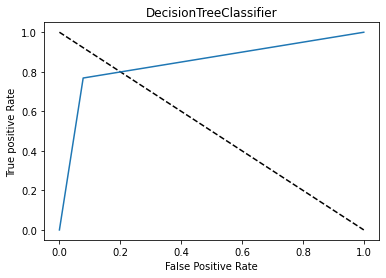

In [99]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('DecisionTreeClassifier')
plt.show()


In [100]:
import pickle

In [101]:
filename="Global Power PLant"
pickle.dump(RandomForest, open(filename,'wb'))

# Overall Observation of the project:

When we are taking capacity as y variable is predicting the model well rather than taking primary fuel as y variable.

Also we have observed that our R2 score is better than accuracy score.

Better to go with regression model and that too with Random Forest Regression(96.2%) 
As we can see that score for classification model is less and becoming more less when we are hypertuning the model